In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
os.chdir("E:\Machine Learning\ML_Projects\Project_2_Logistics_Regression")

In [3]:
%pwd

'E:\\Machine Learning\\ML_Projects\\Project_2_Logistics_Regression'

In [6]:
titanic_df = pd.read_csv(r"E:\Machine Learning\ML_Projects\Project_2_Logistics_Regression\Titanic_dataset.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
len(titanic_df)

891

In [10]:
titanic_df.shape

(891, 12)

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Graph of how many passenger are survived vs died

<AxesSubplot:xlabel='Survived', ylabel='count'>

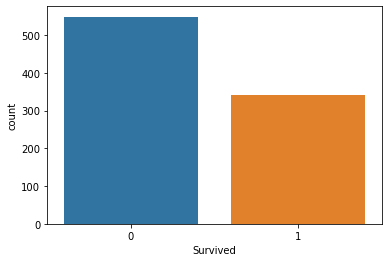

In [15]:
sns.countplot(x="Survived",data=titanic_df)

#### Male Vs Female Passenger Survived vs died graph

<AxesSubplot:xlabel='Survived', ylabel='count'>

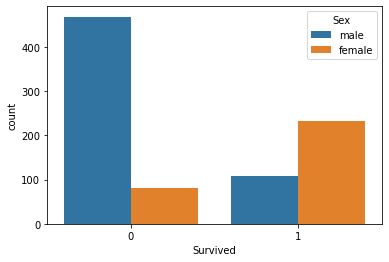

In [16]:
sns.countplot(x="Survived",data=titanic_df,hue='Sex')

### Find null value & handle it.

In [25]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Visualization of null value

<AxesSubplot:>

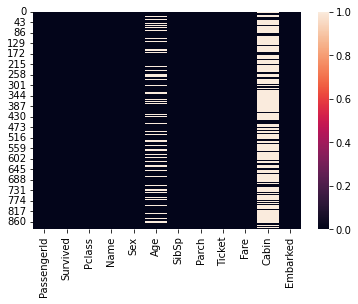

In [26]:
sns.heatmap(titanic_df.isnull())

### If null value is more than 30% in particular column then drop it because it's a case of Overfitting.

In [28]:
titanic_df['Age'].isnull().sum()/891*100       # In age column there are 20% null value

19.865319865319865

In [29]:
titanic_df['Cabin'].isnull().sum()/891*100      # 77% null value then drop column

77.10437710437711

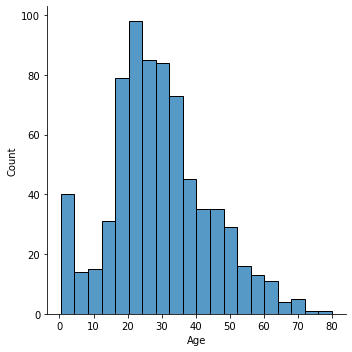

In [30]:
sns.displot(x='Age',data=titanic_df)            # 20 to 40 age group of people travel most

### Data Cleaning

In [ ]:
titanic_df['Age'].mean()

In [32]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [33]:
titanic_df['Age'].isnull().sum()

0

### Drop cabin column

In [34]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [35]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Find out non-numeric column

In [37]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### We can see, Name,Sex,Ticket,Embarked are non-numeric column now name,Ticket and Embarked columns are not useful in machine learning prediction So, we convert sex column into dummy numeric column

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
gender = pd.get_dummies(titanic_df['Sex'],drop_first=True)
print(gender)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]


In [42]:
titanic_df['Gender'] = gender

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [44]:
titanic_df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [45]:
titanic_df.head()          # Fully Numeric value

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


### Divided independent variable and dependent variable

In [46]:
X = titanic_df[['PassengerId','Pclass','Age','Parch','Fare','Gender']]
Y = titanic_df['Survived']

In [48]:
X.tail()

,PassengerId,Pclass,Age,Parch,Fare,Gender
886,887,2,27.000000,0,13.00,1
887,888,1,19.000000,0,30.00,0
888,889,3,29.699118,2,23.45,0
889,890,1,26.000000,0,30.00,1
890,891,3,32.000000,0,7.75,1


In [49]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Data modeling

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [59]:
lr = LogisticRegression()

In [60]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [63]:
y_pred = lr.predict(X_test)

In [67]:
lr.score(X_test,Y_test)

0.7932203389830509

## Testing

In [65]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

### Display Confusion Matrix

In [72]:
pd.DataFrame(confusion_matrix(Y_test,y_pred),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"]) 

,Predicted No,Predicted Yes
Actual No,163,28
Actual Yes,33,71


## Display Accuracy_Score, recall, precision and f1 score

In [73]:
from sklearn.metrics import classification_report

In [75]:
accuracy_score(Y_test,y_pred)

0.7932203389830509

In [74]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       191
           1       0.72      0.68      0.70       104

    accuracy                           0.79       295
   macro avg       0.77      0.77      0.77       295
weighted avg       0.79      0.79      0.79       295



### Find Probability of testing data

In [76]:
y_prob = lr.predict_proba(X_test)       # probability of class 0 & 1
y_prob

array([[0.83326909, 0.16673091],
       [0.87452976, 0.12547024],
       [0.84251744, 0.15748256],
       [0.07900493, 0.92099507],
       [0.13936225, 0.86063775],
       [0.85052429, 0.14947571],
       [0.87112122, 0.12887878],
       [0.77957257, 0.22042743],
       [0.8378128 , 0.1621872 ],
       [0.86454229, 0.13545771],
       [0.81167087, 0.18832913],
       [0.38910112, 0.61089888],
       [0.26023865, 0.73976135],
       [0.78659595, 0.21340405],
       [0.83324442, 0.16675558],
       [0.82953345, 0.17046655],
       [0.87711559, 0.12288441],
       [0.89986452, 0.10013548],
       [0.2567674 , 0.7432326 ],
       [0.84393496, 0.15606504],
       [0.82937436, 0.17062564],
       [0.81815234, 0.18184766],
       [0.20036348, 0.79963652],
       [0.85352416, 0.14647584],
       [0.84685754, 0.15314246],
       [0.8352523 , 0.1647477 ],
       [0.83898343, 0.16101657],
       [0.83747932, 0.16252068],
       [0.76498767, 0.23501233],
       [0.15759627, 0.84240373],
       [0.

### Display ROC Curve and find the AUC score 

In [77]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

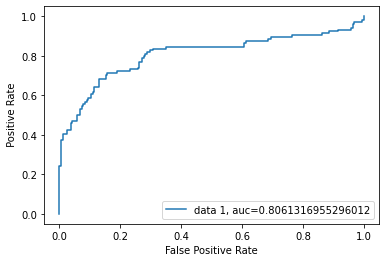

In [82]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()